In [ ]:
# compared numbers for each target category

In [ ]:
# Tried stemming, lemmatizing

In [ ]:
# Model versions that performed worse than baseline

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize
import nltk
np.random.seed(42)
import seaborn as sns
import re
import numpy as np 
import pandas as pd 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [4]:
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

###### Visualizing trends in the 'keyword' column:

In [10]:
train_df["keyword"].value_counts()

fatalities               45
armageddon               42
deluge                   42
harm                     41
damage                   41
                         ..
forest%20fire            19
epicentre                12
threat                   11
inundation               10
radiation%20emergency     9
Name: keyword, Length: 221, dtype: int64

Visualizing the top 10 keywords in both train_df and test_df to see if we notice any trends:

In [11]:
top_train_keywords = train_df['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_train_keywords

,index,keyword
0,fatalities,45
1,deluge,42
2,armageddon,42
3,sinking,41
4,body%20bags,41
5,damage,41
6,harm,41
7,twister,40
8,siren,40
9,windstorm,40


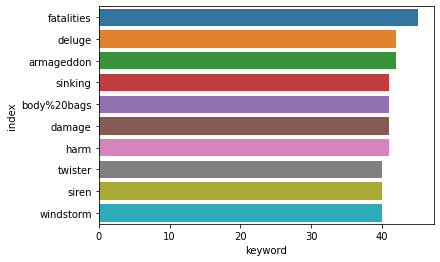

In [12]:
sns.barplot(y=top_train_keywords['index'], x=top_train_keywords['keyword']);

In [13]:
top_test_keywords = test_df['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_test_keywords

,index,keyword
0,deluged,23
1,demolished,22
2,rubble,22
3,seismic,21
4,sirens,21
5,snowstorm,21
6,first%20responders,21
7,obliteration,21
8,annihilation,21
9,mayhem,20


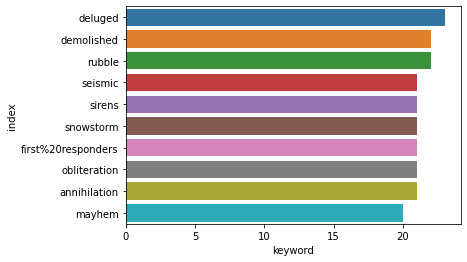

In [14]:
sns.barplot(y=top_test_keywords['index'], x=top_test_keywords['keyword']);

Visualizing the top 10 keywords for the train_df for each target value:

In [15]:
disaster_tweets = train_df[train_df['target']==1]

other_tweets = train_df[train_df['target']==0]

In [16]:
top_dis_keywords = disaster_tweets['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_dis_keywords

,index,keyword
0,wreckage,39
1,derailment,39
2,outbreak,39
3,debris,37
4,oil%20spill,37
5,typhoon,37
6,suicide%20bomb,32
7,evacuated,32
8,rescuers,32
9,suicide%20bombing,32


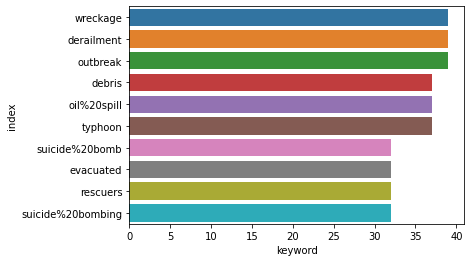

In [17]:
sns.barplot(y=top_dis_keywords['index'], x=top_dis_keywords['keyword']);

In [18]:
top_other_keywords = other_tweets['keyword'].value_counts()[:10].sort_values(ascending=False).reset_index()
top_other_keywords

,index,keyword
0,body%20bags,40
1,armageddon,37
2,harm,37
3,deluge,36
4,wrecked,36
5,ruin,36
6,siren,35
7,explode,35
8,fear,35
9,twister,35


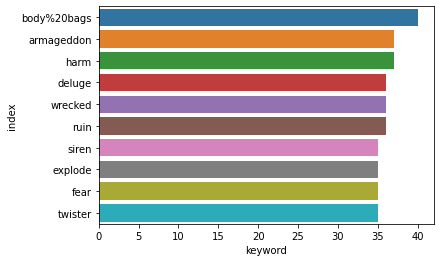

In [19]:
sns.barplot(y=top_other_keywords['index'], x=top_other_keywords['keyword']);

###### Calculating whether either disaster or non-disaster tweets contain a significantly different proportion of numbers:

In [5]:
num_query = r'\$(?:\d)?'

train_df["contains_number"] = train_df["text"].str.contains(num_query)
train_df["contains_number"].value_counts()
#fig, axes = setup_five_subplots()
#plot_distribution_of_column_by_category("contains_price", axes, "Freqency of Posts Containing Prices for")
#fig.suptitle("Distributions of Posts Containing Prices by Category", fontsize=24);

False    7575
True       38
Name: contains_number, dtype: int64

In [6]:
test_df["contains_number"] = test_df["text"].str.contains(num_query)
test_df["contains_number"].value_counts()

False    3241
True       22
Name: contains_number, dtype: int64

In [7]:
print("percent of disaster tweets containing numbers:", ((38/7575)*100))
print("percent of non-disaster tweets containing numbers:", ((22/3241)*100))

percent of disaster tweets containing numbers: 0.5016501650165017
percent of non-disaster tweets containing numbers: 0.6788028386300524


There is a slight difference, but overall this is probably not very important.